# Time Series Data

In [46]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

stock_data = yf.download('AAPL', start='2024-01-01')
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.734970,187.521323,182.993502,186.237603,82488700
2024-01-03,183.351761,184.973819,182.535751,183.321908,58414500
2024-01-04,181.023178,182.197418,179.998201,181.261998,71983600
2024-01-05,180.296707,181.869006,179.291637,181.102771,62303300
2024-01-08,184.655365,184.695178,180.615161,181.202281,59144500
2024-01-09,184.237411,184.247357,181.839157,183.023358,42841800
2024-01-10,185.282303,185.491271,183.023365,183.451277,46792900
2024-01-11,184.685226,186.138115,182.724829,185.630592,49128400


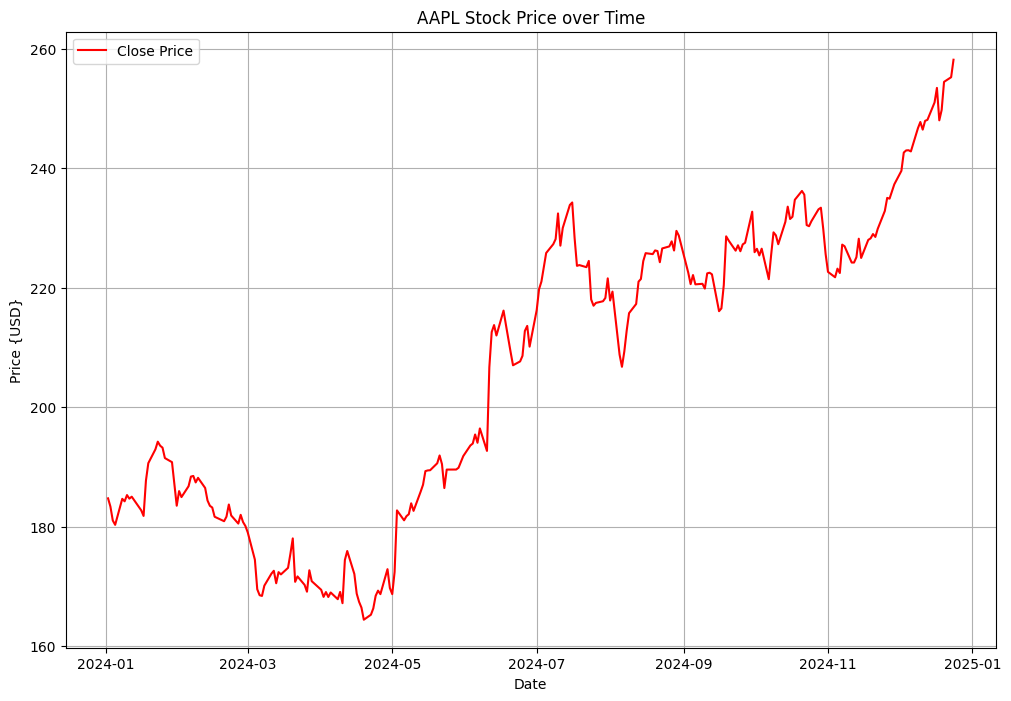

In [47]:
plt.figure(figsize=(12, 8))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price {USD}')
plt.title('AAPL Stock Price over Time')
plt.legend()
plt.grid(True)
plt.show()

# Classical Time Series Decomposition

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(stock_data['Close'], model='additive', period=30)

In [49]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

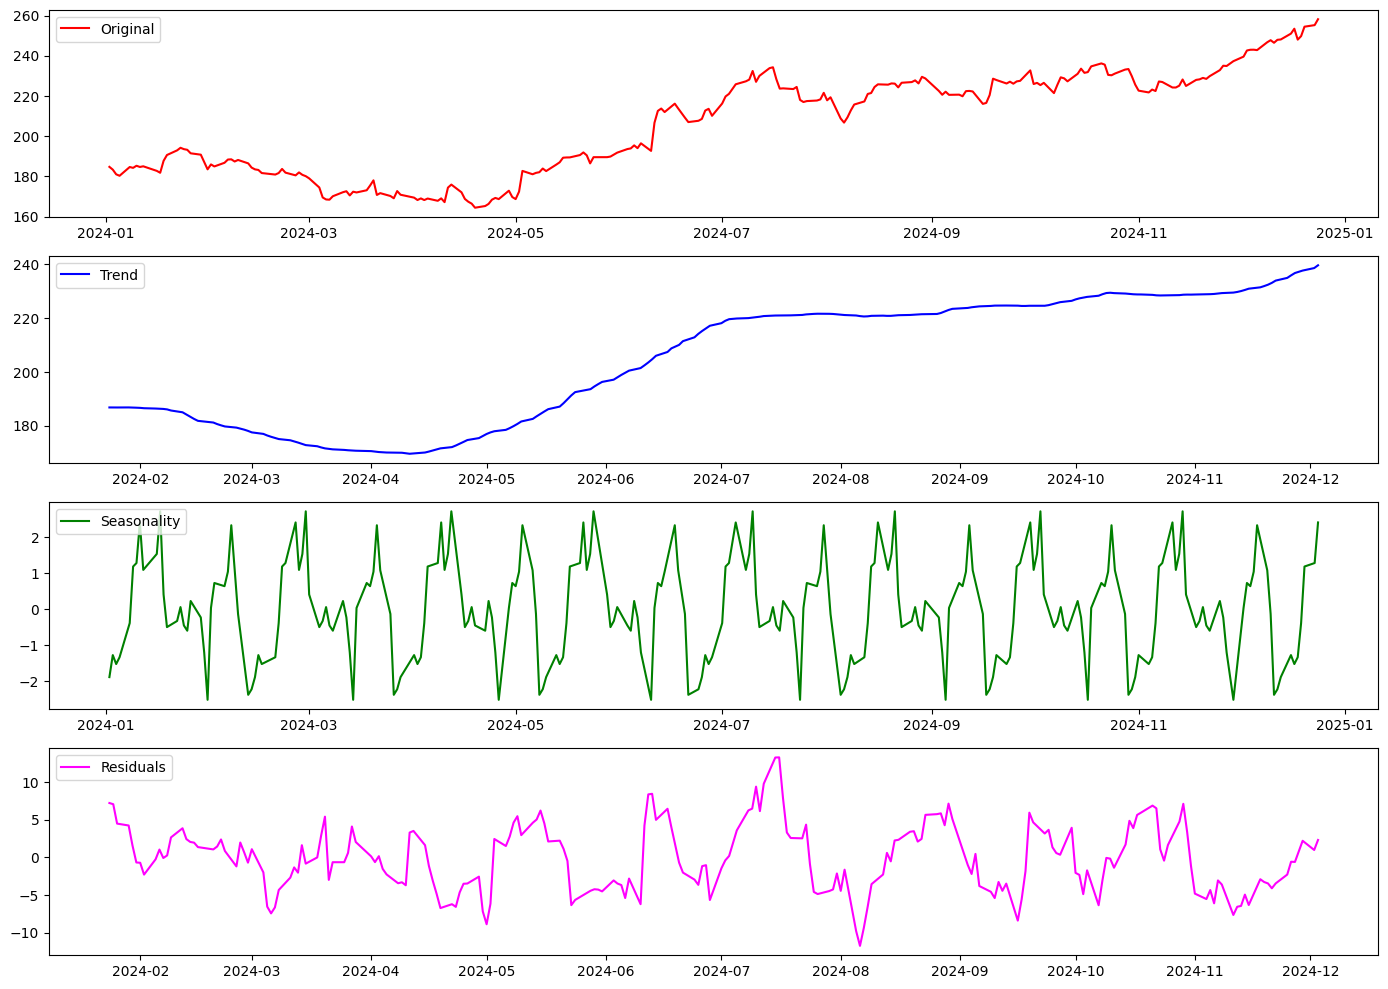

In [50]:
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive, label='Residuals', color='magenta')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# STL Decomposition

In [51]:
from statsmodels.tsa.seasonal import STL

In [52]:
# Perform STL decomposition
stl = STL(stock_data['Close'], period=30)
result = stl.fit()

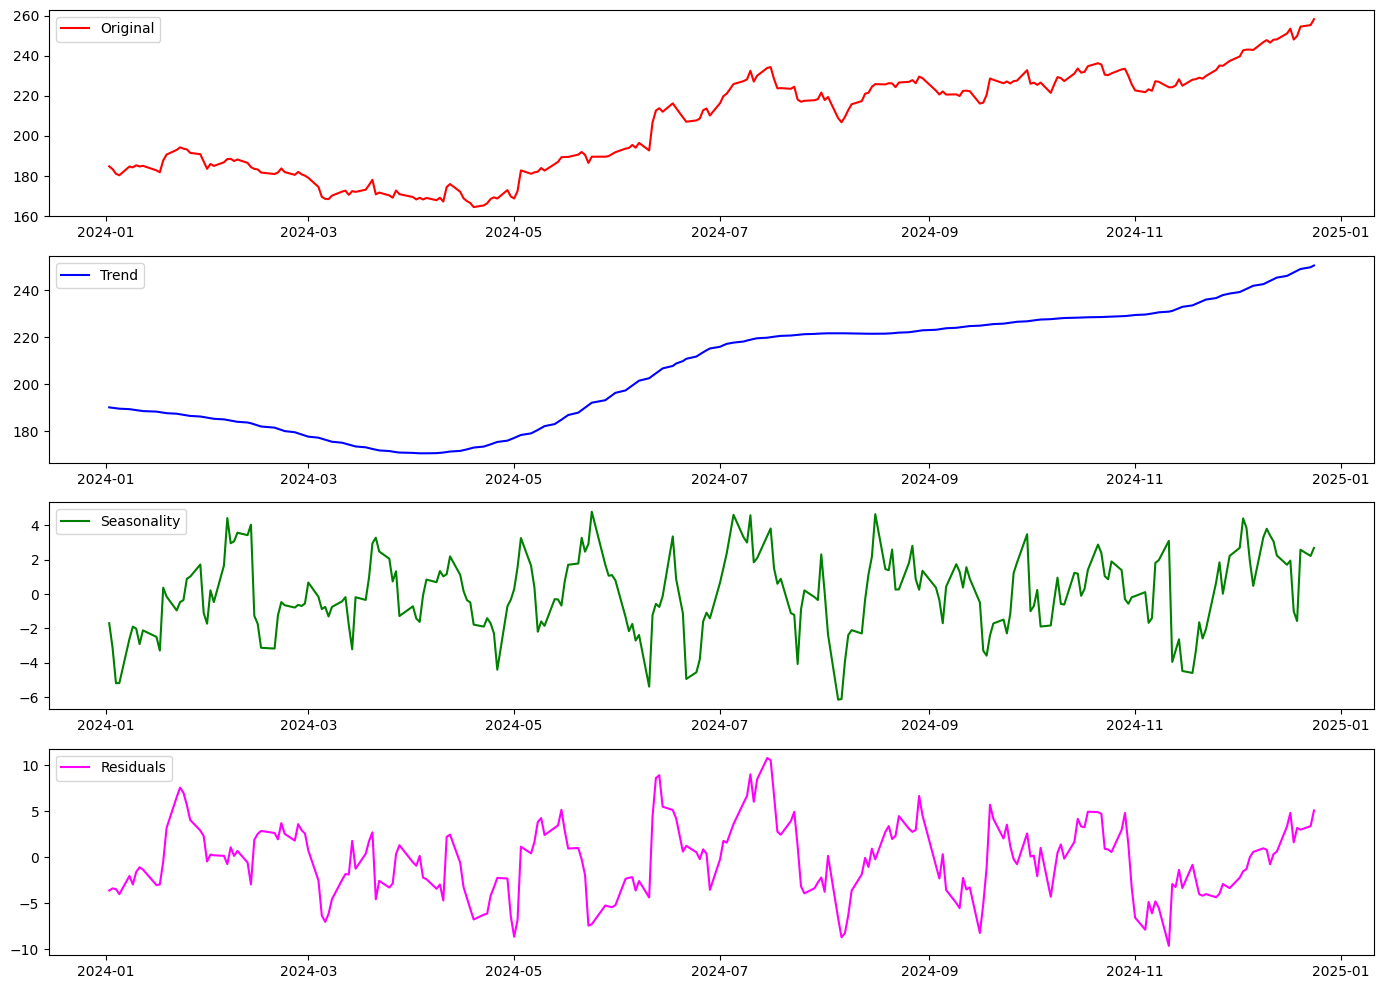

In [53]:
# Plot the STL decomposition components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residuals', color='magenta')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Stationarity Test

### Weak Stationarity Test

In [54]:
from statsmodels.tsa.stattools import adfuller

# persforming Augmented Dickey-Fuller test
adf_test = adfuller(stock_data['Close'])

print('ADF Test Results:')
print(f'ADF Statistics: {round(adf_test[0], 3)}')
print(f'p-value: {round(adf_test[1], 3)}')
print(f'Critical Values:')
for key, value in adf_test[4].items():
    print(f'      {key}: {round(value, 3)}')

ADF Test Results:
ADF Statistics: 0.111
p-value: 0.967
Critical Values:
      1%: -3.457
      5%: -2.873
      10%: -2.573


In [55]:
from statsmodels.tsa.stattools import kpss

# performing KPSS test
kpss_test = kpss(stock_data['Close'], regression='ct') # 'c' for constant {level stationary}, 'ct' for constant and trend {trend stationary}

print('KPSS Test Results:')
print(f'KPSS Statistics: {round(kpss_test[0], 2)}')
print(f'p-value: {(kpss_test[1])}')
print(f'Critical Values:')
for key, value in kpss_test[3].items():
    print(f'      {key}: {round(value, 3)}')

KPSS Test Results:
KPSS Statistics: 0.2
p-value: 0.016557600849179024
Critical Values:
      10%: 0.119
      5%: 0.146
      2.5%: 0.176
      1%: 0.216


### Strong Stationarity Test

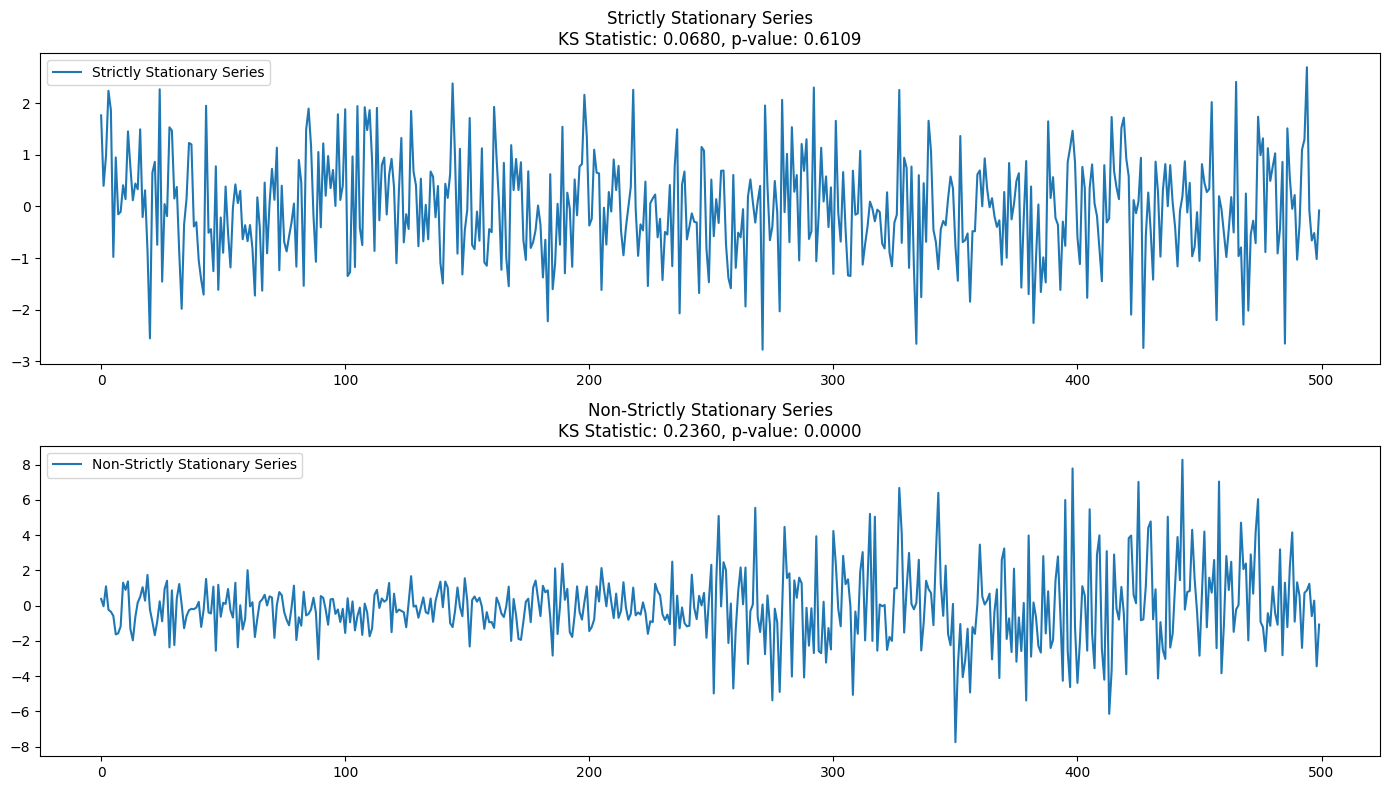

Strictly Stationary Series - KS Test Statistics: 0.0680, p-value: 0.6109101078
Non-Strictly Stationary Series - KS Test Statistics: 0.2360, p-value: 0.0000016178


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Generating synthetic data for demonstration
np.random.seed(0)
n = 500

# Stricly stationary series: normaly distributed random noise
strict_stationary_series = np.random.normal(0, 1, n)

# Non-strictly stationary series: changing variance
non_strict_stationary_series = np.concatenate([
    np.random.normal(0, 1, n//2),
    np.random.normal(0, 3, n//2)
])

# Function to split the data into two halves and perform the Kolmogorov-Smirnov (KS) test
def ks_test_stationary(series):
    split = len(series) // 2
    series_first_half = series[:split]
    series_second_half = series[split:]
    stat, p_value = ks_2samp(series_first_half, series_second_half)
    return stat, p_value

# Perform the KS test on the stictly stationary series
ks_stat_strict, ks_pvalue_strict = ks_test_stationary(strict_stationary_series)

# Perform the KS test on the non-strictly stationary series
ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationary(non_strict_stationary_series)

# Plotting the series
plt.figure(figsize=(14, 8))

# Plot strictly stationary series
plt.subplot(2, 1, 1)
plt.plot(strict_stationary_series, label='Strictly Stationary Series')
plt.title(f'Strictly Stationary Series\nKS Statistic: {ks_stat_strict:.4f}, p-value: {ks_pvalue_strict:.4f}')
plt.legend()

# Plot non-strictly stationary series
plt.subplot(2, 1, 2)
plt.plot(non_strict_stationary_series, label='Non-Strictly Stationary Series')
plt.title(f'Non-Strictly Stationary Series\nKS Statistic: {ks_stat_non_strict:.4f}, p-value: {ks_pvalue_non_strict:.4f}')
plt.legend()

plt.tight_layout()
plt.show()

print(f'Strictly Stationary Series - KS Test Statistics: {ks_stat_strict:.4f}, p-value: {ks_pvalue_strict:.10f}')
print(f'Non-Strictly Stationary Series - KS Test Statistics: {ks_stat_non_strict:.4f}, p-value: {ks_pvalue_non_strict:.10f}') 

# Making Data Stationary

In [57]:
# Performing the Augmented Dickey-Fuller test and KPSS test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value (%s): %.3f' % (key, value))
        
def kpss_test(series):
    result = kpss(series, regression='c')
    print('KPSS Statistics:', result[0])
    print('p-value:', result[1])
    for key, value in result[3].items():
        print(f'Critical Value {key}: {value:.3f}')

In [58]:
prices = stock_data['Close']

In [59]:
adf_test(prices)

ADF Statistics: 0.11063701600144803
p-value: 0.966779873410533
Critical Value (1%): -3.457
Critical Value (5%): -2.873
Critical Value (10%): -2.573


In [60]:
prices

Ticker,AAPL
Date,
2024-01-02,184.734970
2024-01-03,183.351761
2024-01-04,181.023178
2024-01-05,180.296707
2024-01-08,184.655365
...,...
2024-12-18,248.050003
2024-12-19,249.789993
2024-12-20,254.490005


In [61]:
prices_diff = prices.diff()

In [62]:
prices.diff().diff()

Ticker,AAPL
Date,
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,-0.945374
2024-01-05,1.602112
2024-01-08,5.085129
...,...
2024-12-18,-7.869995
2024-12-19,7.169983
2024-12-20,2.960022


In [63]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox

# Convert the DataFrame to a 1-dimensional array
prices = prices.squeeze()

# Log Transformation
prices_log = np.log(prices)

# Square Root Transformation
prices_sqrt = np.sqrt(prices)

# Box-Cox Transformation
prices_boxcox, lam = boxcox(prices[prices > 0])

In [64]:
prices_log

Date
2024-01-02    5.218922
2024-01-03    5.211406
2024-01-04    5.198625
2024-01-05    5.194604
2024-01-08    5.218491
                ...   
2024-12-18    5.513630
2024-12-19    5.520621
2024-12-20    5.539262
2024-12-23    5.542322
2024-12-24    5.553735
Name: AAPL, Length: 248, dtype: float64

In [65]:
prices_sqrt

Date
2024-01-02    13.591724
2024-01-03    13.540744
2024-01-04    13.454485
2024-01-05    13.427461
2024-01-08    13.588796
                ...    
2024-12-18    15.749603
2024-12-19    15.804746
2024-12-20    15.952743
2024-12-23    15.977171
2024-12-24    16.068603
Name: AAPL, Length: 248, dtype: float64

In [66]:
prices_boxcox

array([237.99733571, 236.10033511, 232.90876372, 231.91356499,
       237.888138  , 237.31486018, 238.74821251, 237.92909989,
       238.37958155, 235.25444523, 233.95867728, 242.08091963,
       246.08630195, 249.27413508, 251.04009288, 250.10910353,
       249.65738816, 247.26267557, 246.31881633, 241.27479672,
       236.30499798, 239.66309465, 238.28402205, 240.78301524,
       242.99650127, 243.14684348, 241.65736079, 242.7108363 ,
       240.38528336, 237.50064204, 236.28449357, 235.88831821,
       233.77133956, 232.7474168 , 233.78503569, 236.58508149,
       234.05811046, 232.20143908, 234.20832082, 232.55630898,
       231.64184537, 230.15461666, 223.93860181, 217.1613026 ,
       215.80180696, 215.63872345, 217.99077848, 220.73900451,
       221.39230963, 218.53486356, 221.07926475, 220.56208097,
       222.05935965, 225.27368133, 228.80426643, 218.86130577,
       220.09939603, 218.15402507, 216.60388004, 221.50120796,
       219.01094391, 217.03893001, 215.42124112, 216.52

In [67]:
adf_test(prices_boxcox)

ADF Statistics: 0.12286409464941427
p-value: 0.9675879050079422
Critical Value (1%): -3.457
Critical Value (5%): -2.873
Critical Value (10%): -2.573


In [68]:
adf_test(prices_sqrt)

ADF Statistics: 0.011803187246823544
p-value: 0.9594973843883388
Critical Value (1%): -3.457
Critical Value (5%): -2.873
Critical Value (10%): -2.573


In [69]:
adf_test(prices_diff.dropna())

ADF Statistics: -14.821906832317783
p-value: 1.9578203979142534e-27
Critical Value (1%): -3.457
Critical Value (5%): -2.873
Critical Value (10%): -2.573


In [70]:
2.0165896132424085e-27 < 0.05

True

In [71]:
from scipy import signal

# Using the linear trend
trend = np.polyfit(np.arange(len(prices)), prices, 1)
trendline = np.polyval(trend, np.arange(len(prices)))
prices_detrended = prices - trendline

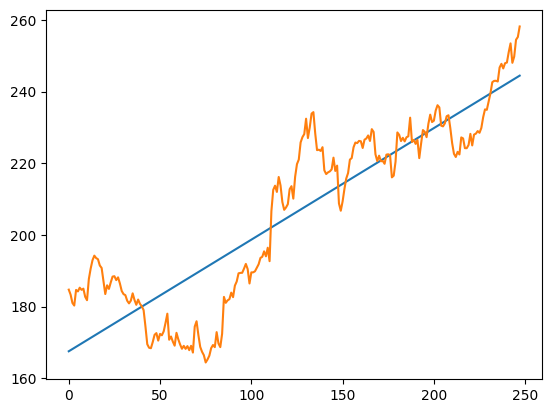

In [72]:
plt.plot(np.arange(len(prices)), trendline)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [73]:
adf_test(prices_detrended)

ADF Statistics: -2.0551952423926942
p-value: 0.2629080357516745
Critical Value (1%): -3.457
Critical Value (5%): -2.873
Critical Value (10%): -2.573


In [74]:
#Using the moving average to remove trend
window_size = 12 # example window size
prices_ma = prices.rolling(window=window_size).mean()
prices_detrended = prices - prices_ma
prices_detrended = prices_detrended.dropna()

In [75]:
adf_test(prices_detrended)

ADF Statistics: -4.392433745058324
p-value: 0.00030611963755893207
Critical Value (1%): -3.458
Critical Value (5%): -2.874
Critical Value (10%): -2.573


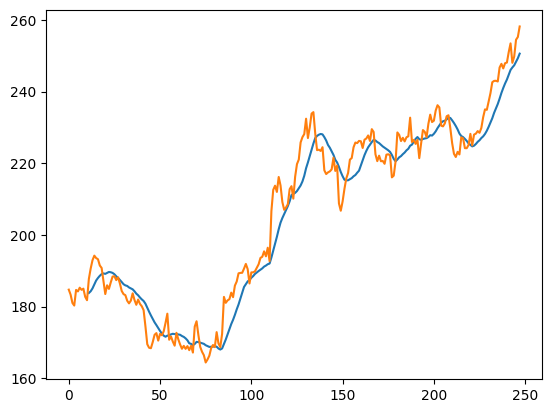

In [76]:
plt.plot(np.arange(len(prices)), prices_ma)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition using moving averages
decomposition = seasonal_decompose(prices, model='additive', period=30)
prices_adjusted = prices / decomposition.seasonal
prices_adjusted = prices_adjusted.dropna()

In [78]:
adf_test(prices_adjusted)

ADF Statistics: -6.206651768749865
p-value: 5.6364925849643405e-08
Critical Value (1%): -3.459
Critical Value (5%): -2.874
Critical Value (10%): -2.573


In [79]:
4.751937596292864e-11 < 0.05

True

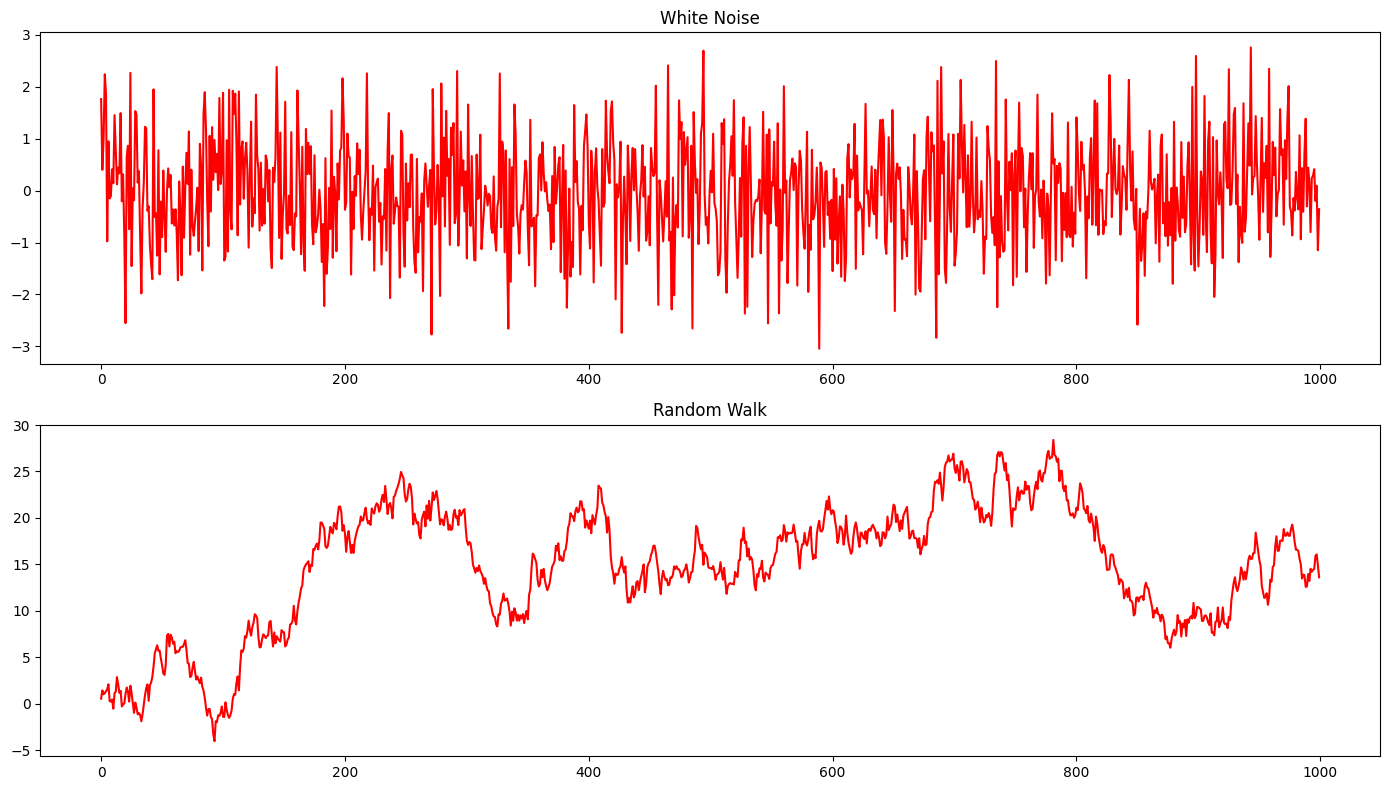


Ljung-Box Test for White Noise:
      lb_stat  lb_pvalue
10  14.025574   0.171828

Ljung-Box Test for Random Walk:
        lb_stat  lb_pvalue
10  8828.660312        0.0


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

# Generating white noise and random walk for comparison
np.random.seed(0)
n = 1000

# White noise
white_noise = np.random.normal(0, 1, n)

# Random walk
random_shocks = np.random.normal(0, 1, n)
random_walk = np.cumsum(random_shocks)

# plotting the series
plt.figure(figsize=(14, 8))

# Plot white noise
plt.subplot(2, 1, 1)
plt.plot(white_noise, color='red')
plt.title('White Noise')

# Plot random walk
plt.subplot(2, 1, 2)
plt.plot(random_walk, color='red')
plt.title('Random Walk')

plt.tight_layout()
plt.show()

# Ljung-Box test on the white noise
print('\nLjung-Box Test for White Noise:')
lb_test_white_noise = acorr_ljungbox(white_noise, lags=[10], return_df=True)
print(lb_test_white_noise)

# Ljung-Box test on the random walk
print('\nLjung-Box Test for Random Walk:')
lb_test_random_walk = acorr_ljungbox(random_walk, lags=[10], return_df=True)
print(lb_test_random_walk)

# Time Sereis Forecasting Models

# AR Model

In [81]:
#Making the series stationary before model fitting
stock_data = yf.download('AAPL', start='2024-01-01')

apple_price_stationary = stock_data['Close'].diff().dropna()

#splitting the data into training and testing sets
train_data, test_data = apple_price_stationary[:-100], apple_price_stationary[-100:]

[*********************100%***********************]  1 of 1 completed


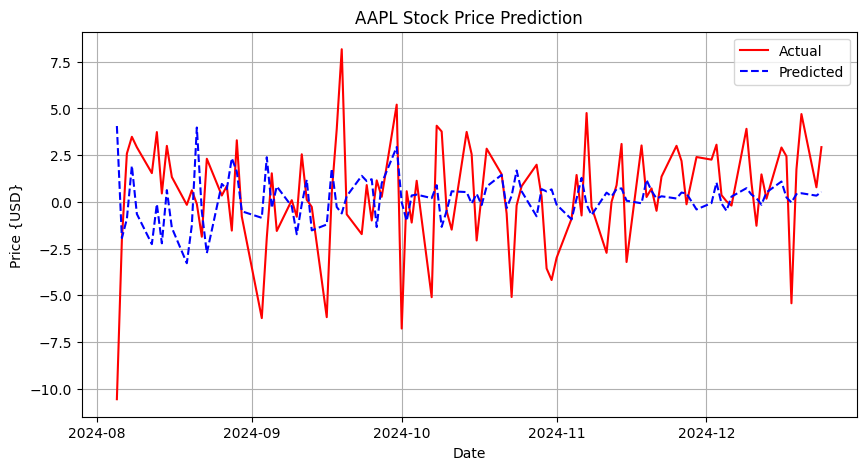

Root Mean Squared Error:  3.1553821050637803


In [82]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#fit auto-regression model to the training data
model = AutoReg(train_data, lags=30)
model_fit = model.fit()

#Make predictions on the test data
preditions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data)+len(test_data)-1, 
    dynamic=False)

#Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Actual', color='red')
plt.plot(test_data.index, preditions, label='Predicted', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price {USD}')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

#Calculate the Mean Squared Error
rmse = np.sqrt(mean_squared_error(test_data, preditions))
print(f'Root Mean Squared Error: ', rmse)

# MA Model

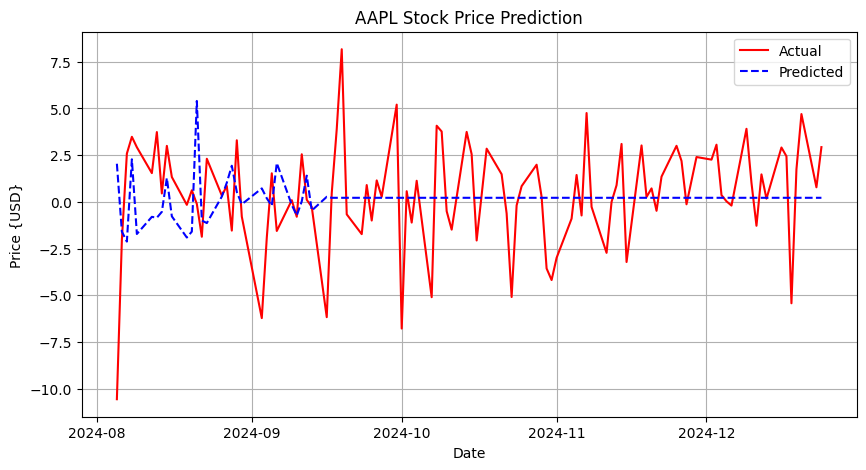

Root Mean Squared Error:  3.0694109977001007


In [83]:
from statsmodels.tsa.arima.model import ARIMA

# Fit MA model to the training data
model = ARIMA(train_data, order=(0, 0, 30))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data)+len(test_data)-1, 
    dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Actual', color='red')
plt.plot(test_data.index, predictions, label='Predicted', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price {USD}')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the Mean Squared Error
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'Root Mean Squared Error: ', rmse)

# ARMA Model

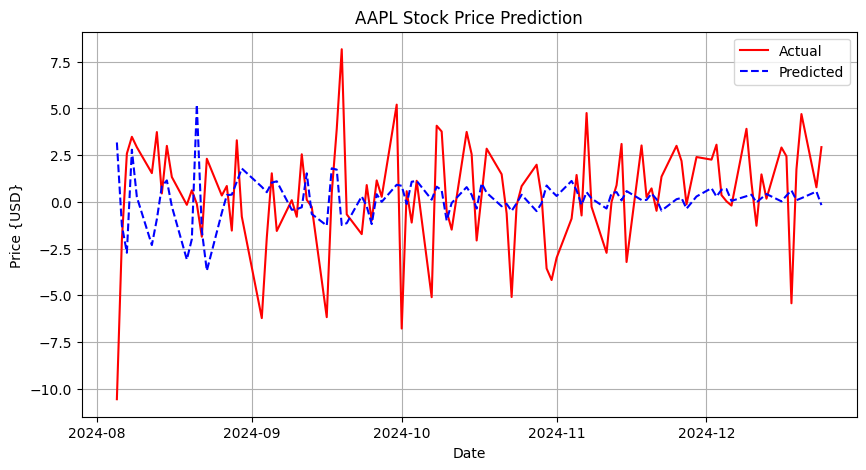

Root Mean Squared Error:  3.150064838061449


In [84]:
model = ARIMA(train_data, order=(30, 0, 30))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data)+len(test_data)-1, 
    dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Actual', color='red')
plt.plot(test_data.index, predictions, label='Predicted', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price {USD}')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the Mean Squared Error
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'Root Mean Squared Error: ', rmse)

# ARIMA Model

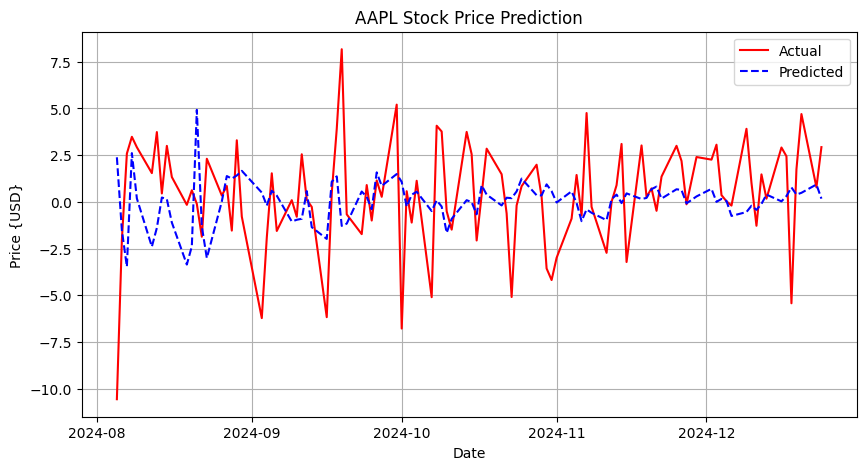

Root Mean Squared Error:  3.150959179105984


In [85]:
model = ARIMA(train_data, order=(30, 1, 30))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data)+len(test_data)-1, 
    dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Actual', color='red')
plt.plot(test_data.index, predictions, label='Predicted', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price {USD}')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the Mean Squared Error
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'Root Mean Squared Error: ', rmse)

# SARIMA Model

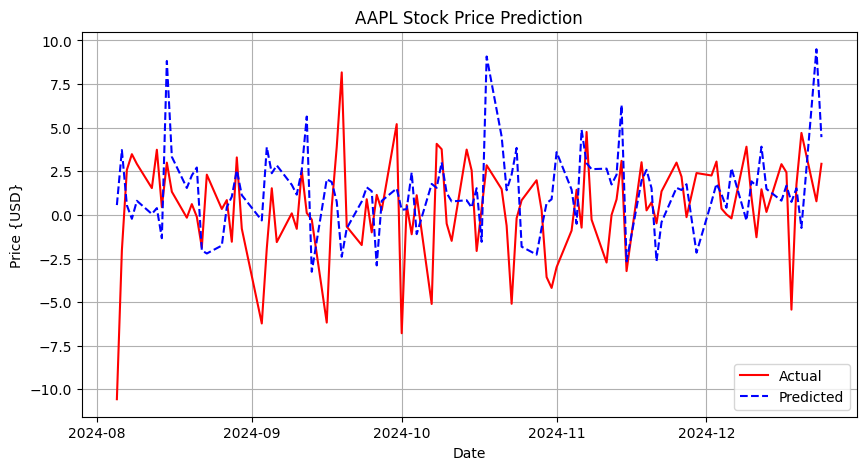

Root Mean Squared Error:  3.7237815641572913


In [86]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q = 7, 1, 7
P, D, Q, s = 1, 1, 1, 45

# Fit SARIMA model to the training data
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data)+len(test_data)-1, 
    dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Actual', color='red')
plt.plot(test_data.index, predictions, label='Predicted', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price {USD}')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'Root Mean Squared Error: ', rmse)

# Vector Model

In [87]:
tsla_data = yf.download('TSLA', start='2024-01-01')

stock_data['TSLA_Close'] = tsla_data['Close']
stock_data['AAPL_Close'] = stock_data['Close'].shift()
stock_data.dropna(inplace=True)

from statsmodels.tsa.stattools import grangercausalitytests

# Perform the Granger Causality test
grangercausalitytests(stock_data[['AAPL_Close', 'TSLA_Close']].dropna(), maxlag=[14])
print()

[*********************100%***********************]  1 of 1 completed


Granger Causality
number of lags (no zero) 14
ssr based F test:         F=1.8196  , p=0.0377  , df_denom=204, df_num=14
ssr based chi2 test:   chi2=29.0958 , p=0.0101  , df=14
likelihood ratio test: chi2=27.4175 , p=0.0170  , df=14
parameter F test:         F=1.8196  , p=0.0377  , df_denom=204, df_num=14



In [88]:
stock_data

Price,Close,High,Low,Open,Volume,TSLA_Close,AAPL_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2024-01-03,183.351746,184.973804,182.535736,183.321893,58414500,238.449997,184.734985
2024-01-04,181.023163,182.197403,179.998185,181.261983,71983600,237.929993,183.351746
2024-01-05,180.296707,181.869006,179.291637,181.102771,62303300,237.490005,181.023163
2024-01-08,184.655365,184.695178,180.615161,181.202281,59144500,240.449997,180.296707
2024-01-09,184.237411,184.247357,181.839157,183.023358,42841800,234.960007,184.655365
...,...,...,...,...,...,...,...
2024-12-18,248.050003,254.279999,247.740005,252.160004,56774100,440.130005,253.479996
2024-12-19,249.789993,252.000000,247.089996,247.500000,60882300,436.170013,248.050003


In [104]:
data = stock_data[['AAPL_Close', 'TSLA_Close']].diff().dropna()
train_data, test_data = data[:-30], data[-30:]

Root Mean Squared Error:  15.88025466480111


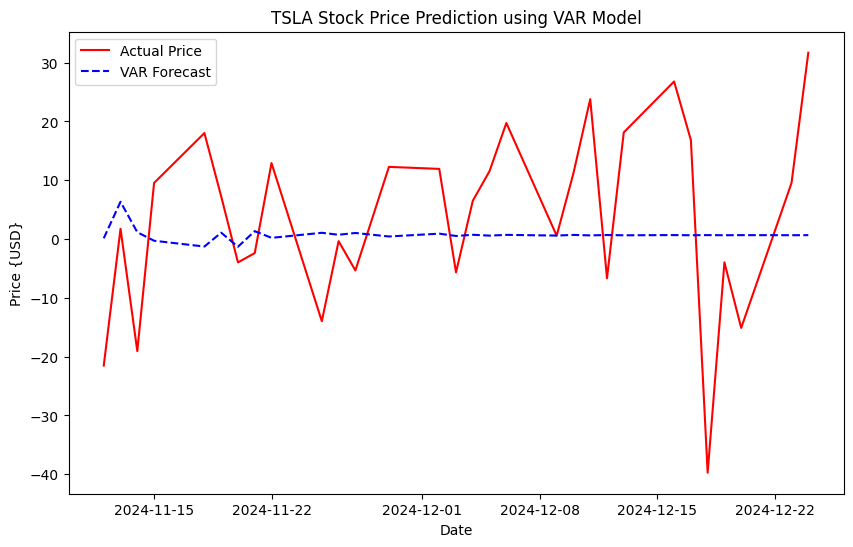

In [105]:
from statsmodels.tsa.api import VAR, VARMAX

# Fit VAR model to the training data
model = VAR(train_data)
results = model.fit(maxlags=7)
predictions = results.forecast(train_data.values[-results.k_ar:], steps=len(test_data))

predictions = pd.DataFrame(predictions, index=test_data.index, columns=test_data.columns)
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Price', color='red')
plt.plot(test_data.index, predictions['TSLA_Close'], label='VAR Forecast', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price {USD}')
plt.title('TSLA Stock Price Prediction using VAR Model')
plt.legend()

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close']))
print(f'Root Mean Squared Error: ', rmse)

# VMA Model

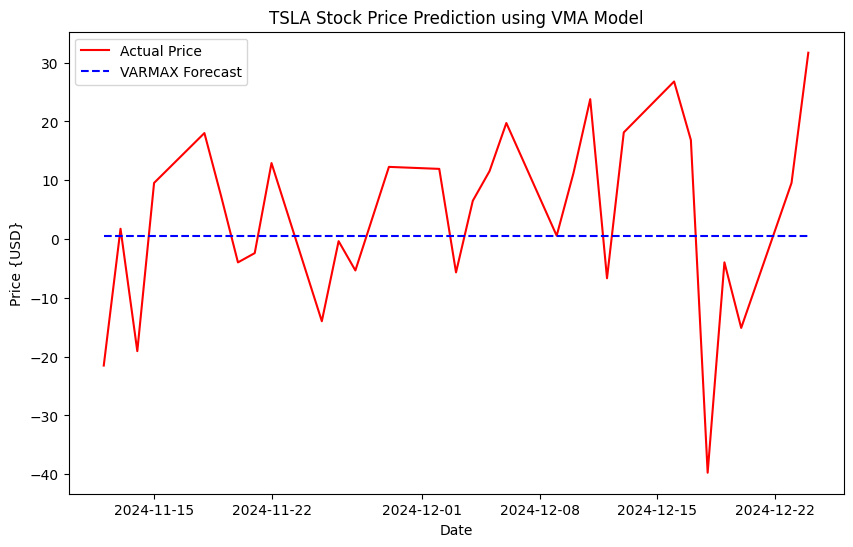

Root Mean Squared Error:  15.784846521675563


In [106]:
model = VARMAX(train_data, order=(0, 14))
results = model.fit()
predictions = results.predict(
    start=len(train_data), 
    end=len(train_data)+len(test_data)-1,
    dynamic=False)  

plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Price', color='red')
plt.plot(test_data.index, predictions['TSLA_Close'], label='VARMAX Forecast', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price {USD}')
plt.title('TSLA Stock Price Prediction using VMA Model')
plt.legend()
plt.show()

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close']))
print(f'Root Mean Squared Error: ', rmse)


# VARIMA

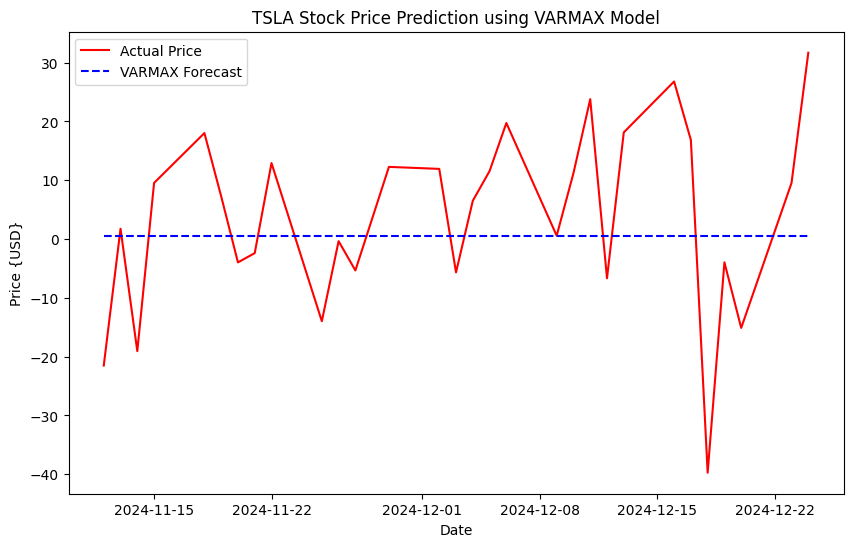

In [107]:
model = VARMAX(train_data, order=(14, 14))
results = model.fit()
predictions = results.predict(
    start=len(train_data), 
    end=len(train_data)+len(test_data)-1,
    dynamic=False)

plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Price', color='red')
plt.plot(test_data.index, predictions['TSLA_Close'], label='VARMAX Forecast', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price {USD}')
plt.title('TSLA Stock Price Prediction using VARMAX Model')
plt.legend()
plt.show()

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close']))


# Smoothing Methonds

## Moving Average

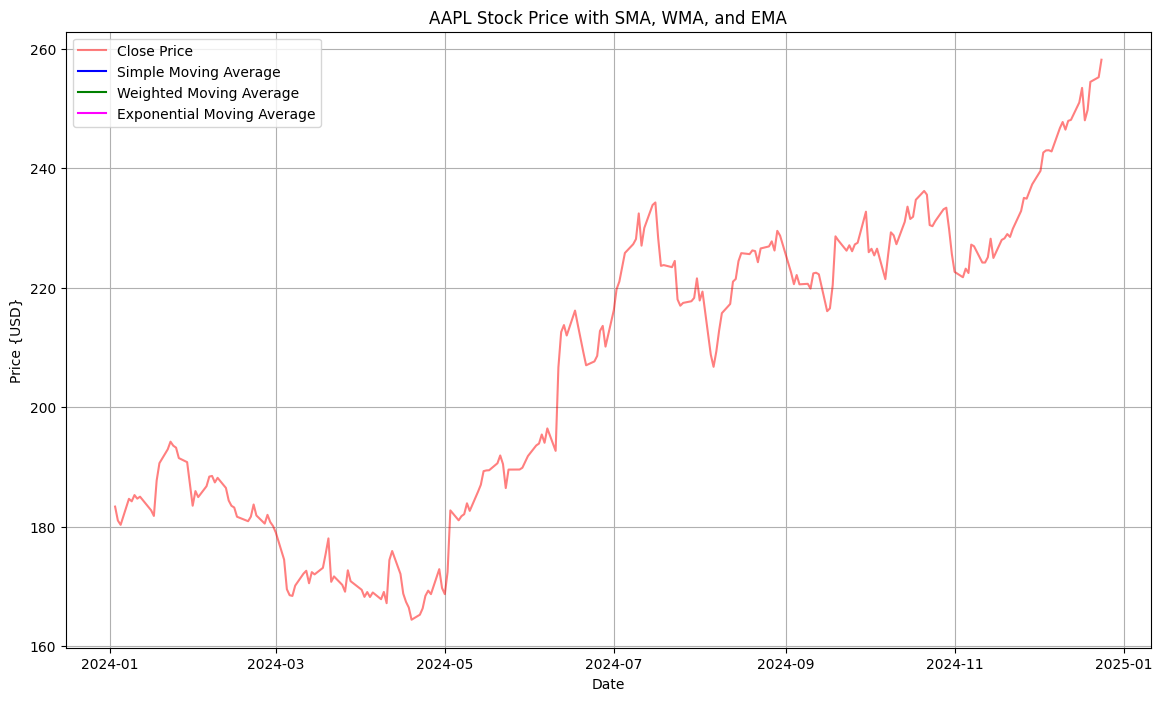

In [108]:
window_size = 20
stock_data['SMA'] = stock_data['Close'].rolling(window=window_size).mean()

#Calculate the Weighted Moving Average
weights = np.arange(1, window_size+1)
stock_data['WMA'] = stock_data['Close'].rolling(window=window_size).apply(lambda x: np.dot(x, weights)/weights.sum(), raw=True)

#Calculate the Exponential Moving Average
stock_data['EMA'] = stock_data['Close'].ewm(span=window_size, adjust=False).mean()

#Plotting
plt.figure(figsize=(14, 8))
plt.plot(stock_data['Close'], label='Close Price', color='red', alpha=0.5)
plt.plot(stock_data['SMA'], label='Simple Moving Average', color='blue')
plt.plot(stock_data['WMA'], label='Weighted Moving Average', color='green')
plt.plot(stock_data['EMA'], label='Exponential Moving Average', color='magenta')
plt.xlabel('Date')
plt.ylabel('Price {USD}')
plt.title('AAPL Stock Price with SMA, WMA, and EMA')
plt.legend()
plt.grid(True)
plt.show()

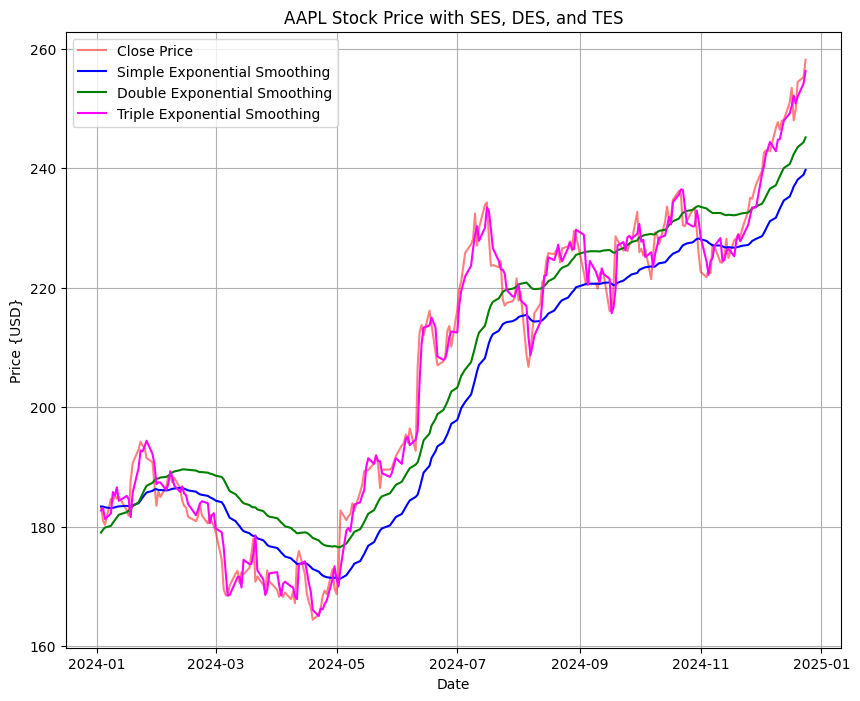

In [113]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

close_price = stock_data['Close']
ses_model = SimpleExpSmoothing(close_price).fit(smoothing_level=0.05)
stock_data['SES'] = ses_model.fittedvalues

# Double Exponential Smoothing
des_model = ExponentialSmoothing(close_price, trend='add').fit(smoothing_level=0.05)
stock_data['DES'] = des_model.fittedvalues

# Triple Exponential Smoothing
tes_model = ExponentialSmoothing(close_price, trend='add', seasonal='add', seasonal_periods=30).fit(smoothing_level=0.7)
stock_data['TES'] = tes_model.fittedvalues

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(stock_data['Close'], label='Close Price', color='red', alpha=0.5)
plt.plot(stock_data['SES'], label='Simple Exponential Smoothing', color='blue')
plt.plot(stock_data['DES'], label='Double Exponential Smoothing', color='green')
plt.plot(stock_data['TES'], label='Triple Exponential Smoothing', color='magenta')
plt.xlabel('Date')
plt.ylabel('Price {USD}')
plt.title('AAPL Stock Price with SES, DES, and TES')
plt.legend()
plt.grid(True)
plt.show()

# More less alpha value, more smooth the curve will be

# ACF and PACF Plot

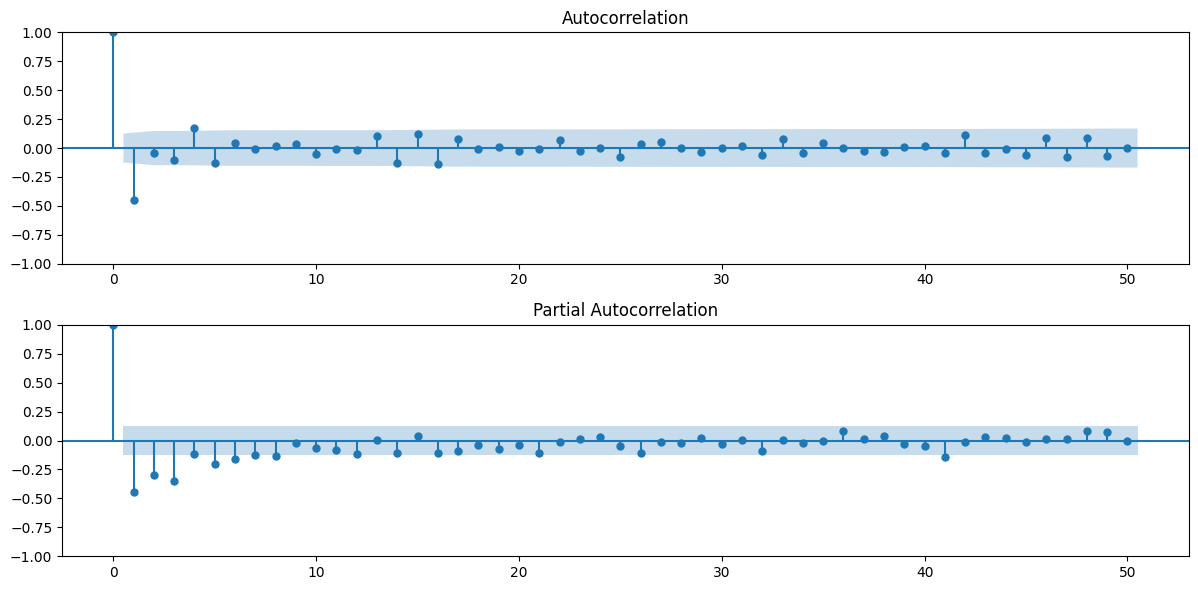

In [115]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))

# Plot the ACF
plt.subplot(2, 1, 1)
plot_acf(stock_data['Close'].diff().diff().dropna(), lags=50, ax=plt.gca())

# Plot the PACF
plt.subplot(2, 1, 2)
plot_pacf(stock_data['Close'].diff().diff().dropna(), lags=50, ax=plt.gca())

# Show the plot
plt.tight_layout()
plt.show()

# Model Evalution Metrics

In [117]:
train_data, test_data = apple_price_stationary[:-100], apple_price_stationary[-100:]

# Fit AR model to the training data
model = AutoReg(train_data, lags=30)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data)+len(test_data)-1, 
    dynamic=False)

In [119]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Mean Squared Error
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error: {mse}')

# 2. Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# 3. Mean Absolute Error
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error: {mae}')

# 4. Mean Absolute Percentage Error
mape = np.mean(np.abs(predictions - test_data)/np.abs(test_data))
print(f'Mean Absolute Percentage Error: {mape}')

# Aic and Bic
aic = model_fit.aic
bic = model_fit.bic

print(f'Akaike Information Criterion: {aic}')
print(f'Baysian Information Criterion: {bic}')

Mean Squared Error: 9.956436228956735
Root Mean Squared Error: 3.1553821050637803
Mean Absolute Error: 2.3497134234189456
Mean Absolute Percentage Error: nan
Akaike Information Criterion: 629.1854790876242
Baysian Information Criterion: 717.5750450011524


In [120]:
model = AutoReg(train_data, lags=20)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data)+len(test_data)-1, 
    dynamic=False)

# 1. Mean Squared Error
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error: {mse}')

# 2. Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# 3. Mean Absolute Error
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error: {mae}')

# 4. Mean Absolute Percentage Error
mape = np.mean(np.abs(predictions - test_data)/np.abs(test_data))
print(f'Mean Absolute Percentage Error: {mape}')

# Aic and Bic
aic = model_fit.aic
bic = model_fit.bic

print(f'Akaike Information Criterion: {aic}')
print(f'Baysian Information Criterion: {bic}')

Mean Squared Error: 8.440677188652398
Root Mean Squared Error: 2.905284355902602
Mean Absolute Error: 2.154874330515236
Mean Absolute Percentage Error: nan
Akaike Information Criterion: 665.601437310127
Baysian Information Criterion: 728.173553212216


# Data Prepreocessing

## Handling Missing Values

In [127]:
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-04', '2024-01-07', '2024-01-09'],
    'Price': [100, 105, 110, 115, 120]
    
}

# Create a DataFrame
data = pd.DataFrame(data)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data

,Price
Date,
2024-01-01,100
2024-01-02,105
2024-01-04,110
2024-01-07,115
2024-01-09,120


In [128]:
# Create a complete date range
complete_index = pd.date_range(start=data.index.min(), end=data.index.max())

# Reindex the DataFrame
data = data.reindex(complete_index)

print("Reindexed DataFrame with missing values:\n", data) 

Reindexed DataFrame with missing values:
             Price
2024-01-01  100.0
2024-01-02  105.0
2024-01-03    NaN
2024-01-04  110.0
2024-01-05    NaN
2024-01-06    NaN
2024-01-07  115.0
2024-01-08    NaN
2024-01-09  120.0


# 1. Imputation

In [131]:
# Mean Imputation
mean_value = data.mean()
data_mean_imputed = data.fillna(mean_value)

# Median Imputation
median_value = data.median()
data_median_imputed = data.fillna(median_value)

# Mode Imputation
mode_value = data.mode().iloc[0]
data_mode_imputed = data.fillna(mode_value)

# Forward Fill
data_ffill = data.ffill()

# Backward Fill
data_bfill = data.bfill()

print("Original DataFrame:\n", data)
print("---------\nMean:\n", mean_value.values[0])
print("---------\nMean Imputation:\n", data_mean_imputed)

print("---------\nMedian:\n", median_value.values[0])
print("---------\nMedian Imputation:\n", data_median_imputed)

print("---------\nMode:\n", mode_value.values[0])
print("---------\nMode Imputation:\n", data_mode_imputed)

print("---------\nForward Fill Imputation:\n", data_ffill)
print("---------\nBackward Fill Imputation:\n", data_bfill)


Original DataFrame:
             Price
2024-01-01  100.0
2024-01-02  105.0
2024-01-03    NaN
2024-01-04  110.0
2024-01-05    NaN
2024-01-06    NaN
2024-01-07  115.0
2024-01-08    NaN
2024-01-09  120.0
---------
Mean:
 110.0
---------
Mean Imputation:
             Price
2024-01-01  100.0
2024-01-02  105.0
2024-01-03  110.0
2024-01-04  110.0
2024-01-05  110.0
2024-01-06  110.0
2024-01-07  115.0
2024-01-08  110.0
2024-01-09  120.0
---------
Median:
 110.0
---------
Median Imputation:
             Price
2024-01-01  100.0
2024-01-02  105.0
2024-01-03  110.0
2024-01-04  110.0
2024-01-05  110.0
2024-01-06  110.0
2024-01-07  115.0
2024-01-08  110.0
2024-01-09  120.0
---------
Mode:
 100.0
---------
Mode Imputation:
             Price
2024-01-01  100.0
2024-01-02  105.0
2024-01-03  100.0
2024-01-04  110.0
2024-01-05  100.0
2024-01-06  100.0
2024-01-07  115.0
2024-01-08  100.0
2024-01-09  120.0
---------
Forward Fill Imputation:
             Price
2024-01-01  100.0
2024-01-02  105.0
2024-01-03  

# Interpolation

In [134]:
# Linear Interpolation
data_linear_interpolated = data.interpolate(method='linear')

# Ploynomial Interpolation degee 2
data_poly_interpolated = data.interpolate(method='polynomial', order=2)

# Spline Interpolation
data_spline_interpolated = data.interpolate(method='spline', order=2)

print("\nLinear Interpolation:\n", data_linear_interpolated)
print("\nPolynomial Interpolation (degree 2):\n", data_poly_interpolated)
print("\nSpline Interpolation (degree 2):\n", data_spline_interpolated)


Linear Interpolation:
                  Price
2024-01-01  100.000000
2024-01-02  105.000000
2024-01-03  107.500000
2024-01-04  110.000000
2024-01-05  111.666667
2024-01-06  113.333333
2024-01-07  115.000000
2024-01-08  117.500000
2024-01-09  120.000000

Polynomial Interpolation (degree 2):
                  Price
2024-01-01  100.000000
2024-01-02  105.000000
2024-01-03  108.054627
2024-01-04  110.000000
2024-01-05  111.672241
2024-01-06  113.160535
2024-01-07  115.000000
2024-01-08  117.279822
2024-01-09  120.000000

Spline Interpolation (degree 2):
                  Price
2024-01-01  100.000000
2024-01-02  105.000000
2024-01-03  106.882286
2024-01-04  110.000000
2024-01-05  111.976116
2024-01-06  114.181120
2024-01-07  115.000000
2024-01-08  117.907307
2024-01-09  120.000000


# Predictive Modeling

In [135]:
data['Sales'] = [100, 105, 110, 115, 120, 400, 500, 65000, 7000]
data


,Price,Sales
2024-01-01,100.0,100
2024-01-02,105.0,105
2024-01-03,NaN,110
2024-01-04,110.0,115
2024-01-05,NaN,120
2024-01-06,NaN,400
2024-01-07,115.0,500
2024-01-08,NaN,65000
2024-01-09,120.0,7000


In [137]:
from sklearn.linear_model import LinearRegression

known_data = data.dropna(subset=['Price'])
missing_data = data[data['Price'].isna()]

# Train a model on the known data
model = LinearRegression()
model.fit(known_data[['Sales']], known_data['Price'])

# Predict the missing values
predicted_values = model.predict(missing_data[['Sales']])
data.loc[data['Price'].isna(), 'Price'] = predicted_values

print("\nData With Predicted Values:\n", data)


Data With Predicted Values:
                  Price  Sales
2024-01-01  100.000000    100
2024-01-02  105.000000    105
2024-01-03  107.214922    110
2024-01-04  110.000000    115
2024-01-05  107.234076    120
2024-01-06  107.770405    400
2024-01-07  115.000000    500
2024-01-08  231.509096  65000
2024-01-09  120.000000   7000


# Resampling

## 1. Downsampling

In [139]:
monthly_sales = stock_data['Close'].resample('M').mean()
print("\nMonthly Downsampled Data:\n", monthly_sales)


Monthly Downsampled Data:
 Ticker            AAPL
Date                  
2024-01-31  186.912804
2024-02-29  184.037743
2024-03-31  172.073871
2024-04-30  168.993066
2024-05-31  185.788819
2024-06-30  205.798268
2024-07-31  224.092422
2024-08-31  221.316174
2024-09-30  223.512093
2024-10-31  229.803258
2024-11-30  227.749033
2024-12-31  248.150000


## 2. Upsampling

In [140]:
hourly_sales = stock_data['Close'].resample('H').interpolate(model='linear')
print("\nHourly Upsampled Data:\n", hourly_sales)


Hourly Upsampled Data:
 Ticker                     AAPL
Date                           
2024-01-03 00:00:00  183.351746
2024-01-03 01:00:00  183.254721
2024-01-03 02:00:00  183.157697
2024-01-03 03:00:00  183.060673
2024-01-03 04:00:00  182.963648
...                         ...
2024-12-23 20:00:00  257.711678
2024-12-23 21:00:00  257.833761
2024-12-23 22:00:00  257.955845
2024-12-23 23:00:00  258.077929
2024-12-24 00:00:00  258.200012

[8545 rows x 1 columns]
